<a href="https://colab.research.google.com/github/abdurrazzz/OIBSIP/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [30]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


<ipython-input-31-552454cce3db>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-31-552454cce3db>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



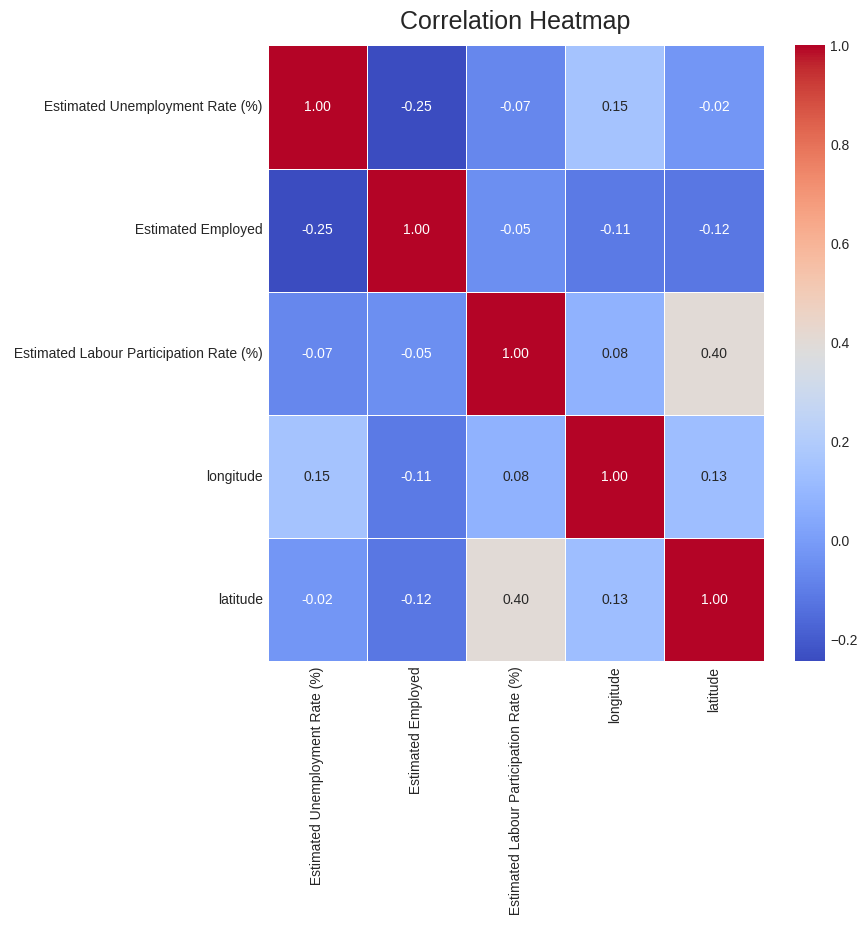

In [31]:
#correlation between the features of this dataset:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

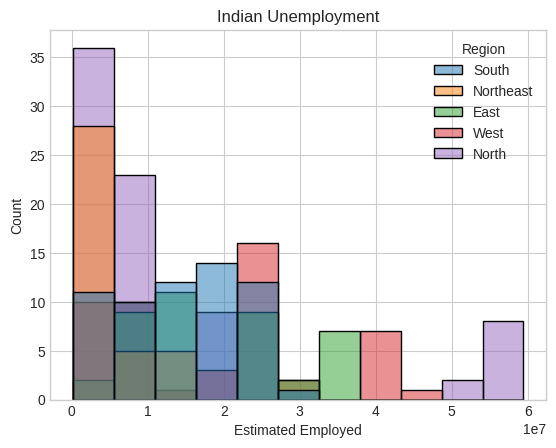

In [32]:
#visualize the data to analyze the unemployment rate. estimated number of employees according to different regions of India:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

In [33]:
#create a dashboard to analyze the unemployment rate of each Indian state by region
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()


In [34]:
x = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude']]
y = data['Estimated Employed']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
x_train

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
10,4.66,13051904,52.98,26.2006,92.9376
46,20.30,4291053,33.97,28.7041,77.1025
112,29.84,16718395,42.78,15.3173,75.7139
35,14.23,7332807,38.48,21.2787,81.8661
212,12.20,19096847,33.16,11.1271,78.6569
...,...,...,...,...,...
246,3.75,56539521,35.49,26.8467,80.9462
51,2.81,478068,38.38,15.2993,74.1240
116,0.50,24094289,43.13,15.3173,75.7139
178,6.18,428419,36.32,11.9416,79.8083


In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)
coeff_data = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_data)

                                      Coefficient
Estimated Unemployment Rate         -5.465360e-11
Estimated Employed                   1.000000e+00
Estimated Labour Participation Rate -2.186716e-11
longitude                            4.122765e-11
latitude                            -1.592852e-11


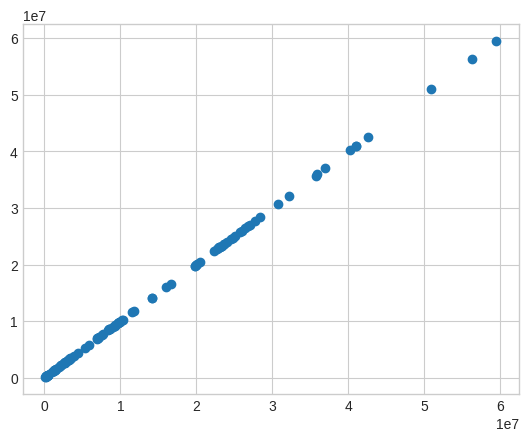

In [37]:
#Predict the model
predictions = lm.predict(x_test)


#plotting the prediction agains the target variable
plt.scatter(y_test, predictions)